<a href="https://colab.research.google.com/github/gandhimonil9823/Covid_Stock_Analysis/blob/main/Covid_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import statistics 
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Merging the Stock Indexes and the currency data with rows as dates and columns as index values
# Preprocessing the data sets with online steps for data processing 
# Figuring a way to convert the unemployment data into county wise data - probably using a probability distribution
# Deal with missing stock data for weekends and holidays

Stock Data: Pre-processing


In [ ]:
# Reading CSVs for three stock indices
df = pd.read_csv("/content/drive/Shared drives/Stock_Covid_Data/stock_data/DJI.csv")
df_DJI = df[["Date", "Adj Close", "Volume"]]

df = pd.read_csv("/content/drive/Shared drives/Stock_Covid_Data/stock_data/NASDAQ.csv")
df_NASDAQ = df[["Date", "Adj Close", "Volume"]]

df = pd.read_csv("/content/drive/Shared drives/Stock_Covid_Data/stock_data/S&P500.csv")
df_SP500 = df[["Date", "Adj Close", "Volume"]]

df_covid_clean_complete = pd.read_csv("/content/drive/Shared drives/Stock_Covid_Data/COVID_19/covid_19_clean_complete.csv")


In [ ]:
# Rename columns in each index in order to merge the indices 
df_NASDAQ = df_NASDAQ.rename(columns={'Adj Close': 'Adj_Close_NASDAQ', 'Volume': 'Volume_NASDAQ'})
df_SP500 = df_SP500.rename(columns={'Adj Close': 'Adj_Close_SP500', 'Volume': 'Volume_SP500'})
df_DJI = df_DJI.rename(columns={'Adj Close': 'Adj_Close_DJI', 'Volume': 'Volume_DJI'})

In [ ]:
# Merging data of three stock indices based on column: 'Date' (merging two DFs at once)
df_Merged = pd.merge(df_SP500, df_DJI, on=['Date'])
df_stock_data = pd.merge(df_Merged, df_NASDAQ, on=['Date'])

In [ ]:
df_stock_data.head()

,Date,Adj_Close_SP500,Volume_SP500,Adj_Close_DJI,Volume_DJI,Adj_Close_NASDAQ,Volume_NASDAQ
0,2015-10-26,2071.179932,3385800000,17623.050781,116660000,5034.700195,1758690000
1,2015-10-27,2065.889893,4216880000,17581.429688,113960000,5030.149902,1986840000
2,2015-10-28,2090.350098,4698110000,17779.519531,115630000,5095.689941,2141130000
3,2015-10-29,2089.409912,4008940000,17755.800781,90300000,5074.270020,1928310000
4,2015-10-30,2079.360107,4256200000,17663.539063,149250000,5053.750000,2016390000


In [ ]:
df_stock_data.shape

(1259, 7)

In [ ]:
df_with_missing = pd.read_csv("/content/drive/Shared drives/Stock_Covid_Data/stock_data/stock_closing_prices_188.csv")
df_with_missing

,Date,Adj_Close_SP500,Adj_Close_DJI,Adj_Close_NASDAQ
0,2020-01-22,3321.750000,29186.26953,9383.769531
1,2020-01-23,3325.540039,29160.08984,9402.480469
2,2020-01-24,3295.469971,28989.73047,9314.910156
3,2020-01-25,3278.098532,28837.62388,9256.004910
4,2020-01-26,3260.818664,28686.31538,9197.472167
...,...,...,...,...
183,2020-07-23,3235.659912,26652.33008,10461.419920
184,2020-07-24,3215.629883,26469.89063,10363.179690
185,2020-07-25,3223.537100,26508.12833,10420.558030
186,2020-07-26,3231.463760,26546.42127,10478.254050


# COVID-19 Data Loading and Preprocessing

In [ ]:
# Function to load the covid_clean_complete dataset from the drive
def load_dataset_us_cases():  
  df_covid_clean_complete = pd.read_csv("/content/drive/Shared drives/Stock_Covid_Data/COVID_19/covid_19_clean_complete.csv")
  return df_covid_clean_complete

# Function to preprocess the clean_complete_dataset
def preprocess_us_cases_df():
  df_US_daily_cases = load_dataset_us_cases()

  # get the daily data only for US
  df_US_daily_cases = df_covid_clean_complete.loc[df_covid_clean_complete['Country/Region'] == "US"]
  
  df_US_daily_cases = df_US_daily_cases.reset_index(drop=True)

  # Added a column for new_cases daily by getting the differerence of the confirmed cases
  df_US_daily_cases["New_cases"] = df_US_daily_cases["Confirmed"].diff()
  
  df_US_daily_cases['New_cases'] = df_US_daily_cases['New_cases'].fillna(0)

  df_US_daily_cases = df_US_daily_cases.rename(columns={"Confirmed": "Total_Confirmed", "Deaths" : "Total_Deaths"})

  return df_US_daily_cases


# Standardize the COVID variables like New_cases, Total_cases, Total_deaths

In [ ]:
# Function to standardize the covid_variables like New_cases, Total_cases, Total_deaths
# Adds new columns to the df with the standarized values
# params - the dataframe, and the column name (COVID Variable) which has to be standarized
def covid_variable_impact_cal(dataframe_to_standardize, column_name):
  # col_mean = dataframe_to_standardize[column_name].mean()
  # col_std  = dataframe_to_standardize[column_name].std()

  col_name = "Standardized_Value_" + column_name
  dataframe_to_standardize[col_name] = dataframe_to_standardize[column_name]

  i = 0
  j = 0
  while i < len(dataframe_to_standardize):
    j = i
    if i > 7:
      col_mean = dataframe_to_standardize[column_name][j - 8: j - 1].mean()
      col_std  = statistics.stdev(dataframe_to_standardize[column_name][j - 8: j - 1])

      curr_daily_value = dataframe_to_standardize[column_name][i]

      formula_cal_value = (curr_daily_value - col_mean) / col_std

      dataframe_to_standardize.loc[i, col_name] = formula_cal_value

    i += 1
  dataframe_to_standardize[col_name].replace(np.inf, 0, inplace=True)
  return dataframe_to_standardize

In [ ]:
df_US_daily_cases = preprocess_us_cases_df()
df_US_daily_cases.head()



,Province/State,Country/Region,Lat,Long,Date,Total_Confirmed,Total_Deaths,Recovered,Active,WHO Region,New_cases
0,NaN,US,40.0,-100.0,2020-01-22,1,0,0,1,Americas,0.0
1,NaN,US,40.0,-100.0,2020-01-23,1,0,0,1,Americas,0.0
2,NaN,US,40.0,-100.0,2020-01-24,2,0,0,2,Americas,1.0
3,NaN,US,40.0,-100.0,2020-01-25,2,0,0,2,Americas,0.0
4,NaN,US,40.0,-100.0,2020-01-26,5,0,0,5,Americas,3.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


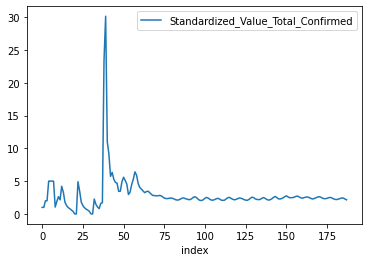

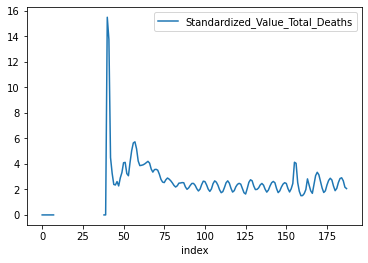

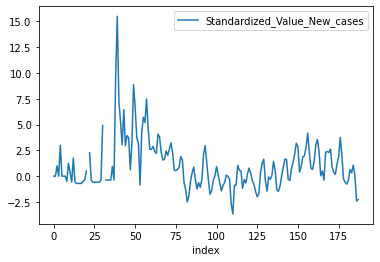

In [ ]:
df_standarized_total_confirmed = covid_variable_impact_cal(df_US_daily_cases, "Total_Confirmed")

df_standarized_total_confirmed.reset_index().plot(x='index', y='Standardized_Value_Total_Confirmed')    

df_standarized_Total_Deaths = covid_variable_impact_cal(df_US_daily_cases, "Total_Deaths")

df_standarized_Total_Deaths.reset_index().plot(x='index', y='Standardized_Value_Total_Deaths')

df_standarized_New_cases = covid_variable_impact_cal(df_US_daily_cases, "New_cases")

df_standarized_New_cases.reset_index().plot(x='index', y='Standardized_Value_New_cases')

## Computing Stock paramaters - Abnormal price and Volatality:

In [ ]:
def stock_params(df_stock_data):
  # splitting stock data as pre-covid and covid
  mask = (df_stock_data['Date'] >= '2015-10-26') & (df_stock_data['Date'] <= '2020-01-21')
  historical_stock_data = df_stock_data.loc[mask]

  mask = (df_stock_data['Date'] > '2020-01-21') & (df_stock_data['Date'] <= '2020-07-27') #135 days excluding weekends - 188 days including
  covid_stock_data =  df_stock_data.loc[mask]
  covid_closing_prices = covid_stock_data.iloc[:, lambda df: [1,3,5]]
  
  print("P_t")
  print(covid_closing_prices)

  # compute the average price between 2015-10-26 and 2020-01-21
  history_closing_prices = historical_stock_data.iloc[:, lambda df: [1,3,5]]
  history_total = history_closing_prices.sum()
  avg_history_total = history_total.div(1066)

  print("P_t-i")
  print(avg_history_total)

  # compute standard deviation
  diff = history_closing_prices - [avg_history_total[0], avg_history_total[1], avg_history_total[2]]
  sd_stock_indices = (diff**2 / 1066)**0.5

  print("sigma_P")
  print(sd_stock_indices)


  return historical_stock_data,covid_stock_data


In [ ]:
historical_stock_data,covid_stock_data = stock_params(df_stock_data)
# print(historical_stock_data)
# print(covid_stock_data)

P_t
      Adj_Close_SP500  Adj_Close_DJI  Adj_Close_NASDAQ
1066      3321.750000   29186.269531       9383.769531
1067      3325.540039   29160.089844       9402.480469
1068      3295.469971   28989.730469       9314.910156
1069      3243.629883   28535.800781       9139.309570
1070      3276.239990   28722.849609       9269.679688
...               ...            ...               ...
1191      3257.300049   26840.400391      10680.360352
1192      3276.020020   27005.839844      10706.129883
1193      3235.659912   26652.330078      10461.419922
1194      3215.629883   26469.890625      10363.179688
1195      3239.409912   26584.769531      10536.269531

[130 rows x 3 columns]
P_t-i
Adj_Close_SP500      2538.303169
Adj_Close_DJI       22624.756401
Adj_Close_NASDAQ     6608.168708
dtype: float64
sigma_P
      Adj_Close_SP500  Adj_Close_DJI  Adj_Close_NASDAQ
0           14.307141     153.193213         48.192500
1           14.469166     154.467992         48.331867
2           13.7199

In [ ]:
covid_stock_data

,Date,Adj_Close_SP500,Volume_SP500,Adj_Close_DJI,Volume_DJI,Adj_Close_NASDAQ,Volume_NASDAQ
1066,2020-01-22,3321.750000,3619850000,29186.269531,283440000,9383.769531,2449390000
1067,2020-01-23,3325.540039,3764860000,29160.089844,307060000,9402.480469,2460050000
1068,2020-01-24,3295.469971,3707130000,28989.730469,380010000,9314.910156,2611710000
1069,2020-01-27,3243.629883,3823100000,28535.800781,337270000,9139.309570,2583330000
1070,2020-01-28,3276.239990,3526720000,28722.849609,330140000,9269.679688,2157830000
...,...,...,...,...,...,...,...
1191,2020-07-21,3257.300049,4547960000,26840.400391,364930000,10680.360352,5311750000
1192,2020-07-22,3276.020020,4255190000,27005.839844,404340000,10706.129883,4074020000
1193,2020-07-23,3235.659912,4290460000,26652.330078,419800000,10461.419922,4469470000
1194,2020-07-24,3215.629883,3894900000,26469.890625,494170000,10363.179688,4205330000


In [ ]:
historical_stock_data

,Date,Adj_Close_SP500,Volume_SP500,Adj_Close_DJI,Volume_DJI,Adj_Close_NASDAQ,Volume_NASDAQ
0,2015-10-26,2071.179932,3385800000,17623.050781,116660000,5034.700195,1758690000
1,2015-10-27,2065.889893,4216880000,17581.429688,113960000,5030.149902,1986840000
2,2015-10-28,2090.350098,4698110000,17779.519531,115630000,5095.689941,2141130000
3,2015-10-29,2089.409912,4008940000,17755.800781,90300000,5074.270020,1928310000
4,2015-10-30,2079.360107,4256200000,17663.539063,149250000,5053.750000,2016390000
...,...,...,...,...,...,...,...
1061,2020-01-14,3283.149902,3665130000,28939.669922,287440000,9251.330078,2542170000
1062,2020-01-15,3289.290039,3716840000,29030.220703,260270000,9258.700195,2435650000
1063,2020-01-16,3316.810059,3535080000,29297.640625,252110000,9357.129883,2301400000
1064,2020-01-17,3329.620117,3698170000,29348.099609,321820000,9388.940430,2522670000
